In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
# directory_19 = r'F:\Ecobee\files\2019_sac'
# for filename in os.listdir(directory_19):
#     if filename.endswith(".zip"):
#         print(os.path.join(directory_19, filename))
#     else:
#         continue

In [4]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_nonpeak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 0) &
                        (df_temp1['DateTime'].dt.hour < 12) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_nonpeak = pd.concat([df_sac_18_daily_nonpeak, df_day])
    g.close()
    myzip.close()

In [5]:
df_sac_18_daily_nonpeak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21189 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21189 non-null  object 
 1   daily_total_heating  21189 non-null  float64
 2   daily_total_cooling  21189 non-null  float64
 3   user_id              21189 non-null  object 
dtypes: float64(2), object(2)
memory usage: 827.7+ KB


In [6]:
# pd.set_option('display.max_rows', None)
# #remove user_ids that have no cooling consumption at all for 2018
# df_18_temp=df_sac_18_daily_nonpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
# df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
# df_sac_18_daily_nonpeak=pd.merge(df_18_temp,df_sac_18_daily_nonpeak,how='left', on='user_id')


In [7]:
df_sac_18_daily_nonpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2018-06-01,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2018-06-02,0.0,0.162500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2018-06-03,0.0,0.845833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2018-06-04,0.0,1.654167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2018-06-05,0.0,0.308333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [8]:
from zipfile import ZipFile
directory_19 = r'F:\Ecobee\files\2019_sac'
df_sac_19_daily_nonpeak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 0) &
                        (df_temp1['DateTime'].dt.hour < 12) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_nonpeak = pd.concat([df_sac_19_daily_nonpeak, df_day])
    f.close()
    myzip.close()

In [9]:
df_sac_19_daily_nonpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [10]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2019
df_19_temp=df_sac_19_daily_nonpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
df_sac_19_daily_nonpeak=pd.merge(df_19_temp,df_sac_19_daily_nonpeak,how='left', on='user_id')

In [11]:
df_sac_19_daily_nonpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-01,0.0,0.0
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-02,0.0,0.0
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-03,0.0,0.0
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-04,0.0,0.0
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-05,0.0,0.0


In [12]:
df_sac_18n19_daily_nonpeak=pd.concat([df_sac_18_daily_nonpeak,df_sac_19_daily_nonpeak])
df_sac_18n19_daily_nonpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2018-06-01,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2018-06-02,0.0,0.162500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2018-06-03,0.0,0.845833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2018-06-04,0.0,1.654167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2018-06-05,0.0,0.308333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [13]:
df_sac_18n19_daily_nonpeak['count'] = df_sac_18n19_daily_nonpeak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_nonpeak['count'].value_counts(sort=True, ascending=False).head(10)

243    28431
121    16335
122     3538
242     1694
241     1687
222     1332
236      708
240      480
239      478
238      476
Name: count, dtype: int64

In [14]:
df_sac_18n19_daily_nonpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count
0,2018-06-01,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
1,2018-06-02,0.0,0.162500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
2,2018-06-03,0.0,0.845833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
3,2018-06-04,0.0,1.654167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
4,2018-06-05,0.0,0.308333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243


In [15]:
df_sac_18n19_daily_nonpeak=df_sac_18n19_daily_nonpeak[df_sac_18n19_daily_nonpeak['count']>=241]
df_sac_18n19_daily_nonpeak['Date']=pd.to_datetime(df_sac_18n19_daily_nonpeak['Date'])
df_sac_18n19_daily_nonpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count
0,2018-06-01,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
1,2018-06-02,0.0,0.162500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
2,2018-06-03,0.0,0.845833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
3,2018-06-04,0.0,1.654167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
4,2018-06-05,0.0,0.308333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243


In [16]:
df_sac_18n19_daily_nonpeak.user_id.nunique()

131

In [17]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [18]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [19]:
df_sac_18n19_daily_nonpeak_w_temperature=pd.merge(df_sac_18n19_daily_nonpeak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_nonpeak_w_temperature.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,2018-06-01,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,2018-06-02,0.0,0.162500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,2018-06-03,0.0,0.845833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,2018-06-04,0.0,1.654167,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,2018-06-05,0.0,0.308333,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [20]:
df_sac_18n19_daily_nonpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_nonpeak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_nonpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_nonpeak_w_temperature[
        'TAVG_less_62'].apply(lambda x: x if x > 0 else 0)

In [21]:
df_sac_18n19_daily_nonpeak_w_temperature['y2019'] = np.where(
    df_sac_18n19_daily_nonpeak_w_temperature['Date'].dt.year == 2019, 1, 0)
# [df_sac_18n19_daily_nonpeak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_nonpeak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,31812.000000,31812.000000,31812.000000,31812.000000,31812.000000,31812.000000,31812.000000,31812.000000
mean,0.001625,0.486175,242.840689,72.719917,90.369860,58.489092,10.756978,0.497894
std,0.041635,0.963393,0.489897,5.188728,7.238272,4.005039,5.098138,0.500003
min,0.000000,0.000000,241.000000,58.000000,69.000000,45.000000,0.000000,0.000000
25%,0.000000,0.000000,243.000000,69.000000,86.000000,56.000000,7.000000,0.000000
50%,0.000000,0.000000,243.000000,73.000000,91.000000,58.000000,11.000000,0.000000
75%,0.000000,0.608333,243.000000,76.000000,96.000000,61.000000,14.000000,1.000000
max,3.995833,12.000000,243.000000,86.000000,105.000000,69.000000,24.000000,1.000000


In [22]:
df_sac_18n19_daily_nonpeak_w_temperature[
    'interaction'] = df_sac_18n19_daily_nonpeak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_nonpeak_w_temperature['y2019']

In [23]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_nonpeak_w_temperature.groupby('user_id').apply(
    regress, 'daily_total_cooling', ['TAVG_less_62','interaction']).reset_index()
results.head()

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.090409,-0.052959,-0.228739
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.013959,-0.003433,-0.060192
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.053622,0.020124,-0.280388
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.026873,0.163475,-0.254683
4,0614c5d47de23d61b21be2141907668a54bf45a0,0.087290,0.167151,-0.462331


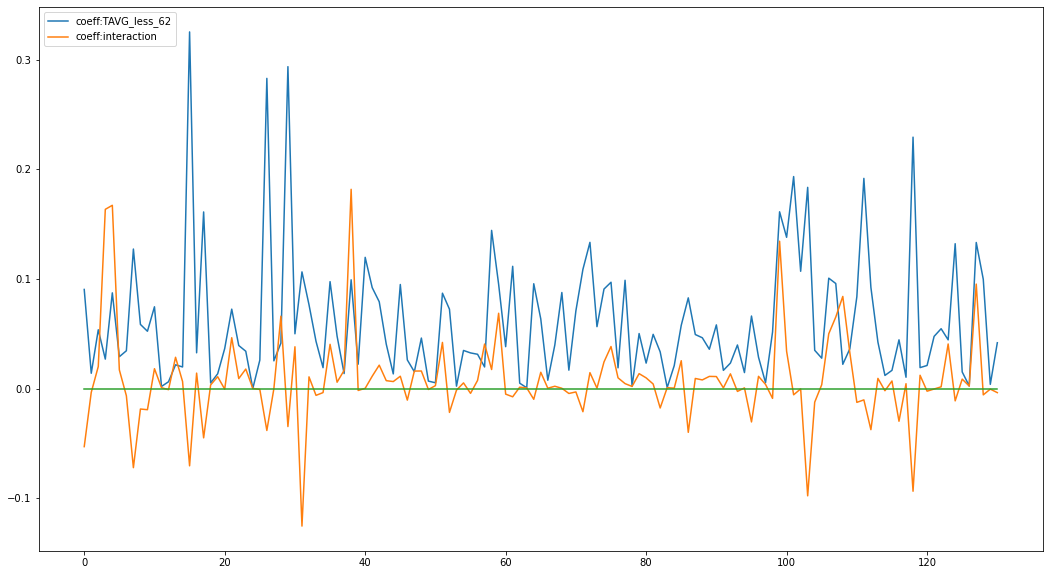

In [24]:
# x axis range
x = range(len(results))
plt.figure(figsize=(18, 10))
# y2
plt.plot(x, results['TAVG_less_62'], label='coeff:TAVG_less_62')
# y2
plt.plot(x, results['interaction'], label='coeff:interaction')
# y=0 line
plt.plot(x, [0] * len(results))
plt.legend(loc="upper left")

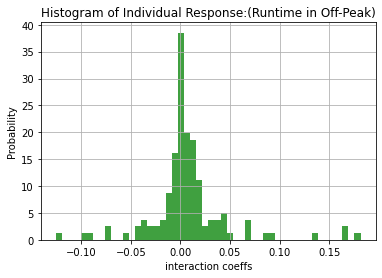

In [25]:
plt.hist(results['interaction'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('interaction coeffs')
plt.ylabel('Probability')
plt.title('Histogram of Individual Response:(Runtime in Off-Peak)')
plt.grid(True)
plt.show()

In [26]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         44
TAVG_less_62    44
interaction     44
intercept       44
dtype: int64
user_id         23
TAVG_less_62    23
interaction     23
intercept       23
dtype: int64


In [27]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

1.8281288760698007
-0.9232919291947715


In [28]:
df_sac_18n19_daily_nonpeak_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_nonpeak_w_temperature['daily_total_cooling'], \
              exog=df_sac_18n19_daily_nonpeak_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print(reg_result.summary())
#Off-peak hours: Midnight to Noon (not removing zero consumption)
#2019 consumption INCREASED (by 12%)

                             OLS Regression Results                            
Dep. Variable:     daily_total_cooling   R-squared:                       0.126
Model:                             OLS   Adj. R-squared:                  0.126
Method:                  Least Squares   F-statistic:                     1684.
Date:                 Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                         09:57:29   Log-Likelihood:                -41808.
No. Observations:                31812   AIC:                         8.362e+04
Df Residuals:                    31809   BIC:                         8.365e+04
Df Model:                            2                                         
Covariance Type:                   HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TAVG_less_62     0.0615      0.001    

In [29]:
df_sac_18n19_daily_nonpeak.user_id.nunique()

131

# Non-peak hours: 
2019 consumption INCREASED (12%), OFFSETTING (69.1%=74/107) peak hours savings (assuming equivalent working power of AC cooling); but can still be effective because of higher generation costs in peak hours